In [216]:
# Titanic Keras and Deep Learning Project

In [217]:
## Titanic Gemisinde Hayatta Kalanları Derin Öğrenme ile Tahmin Eden Classification Project

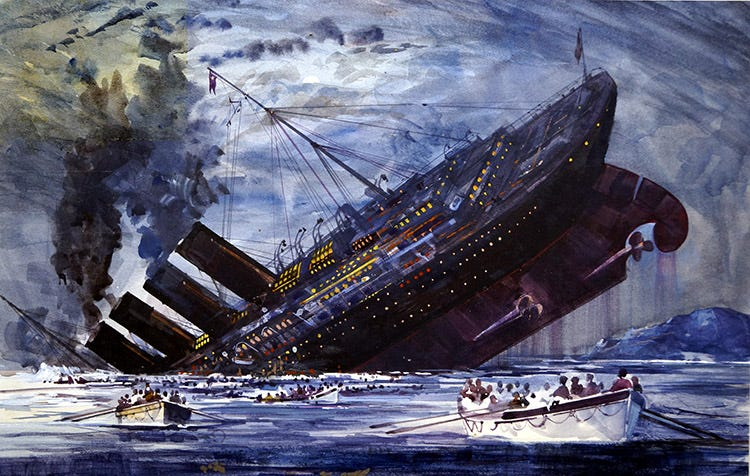

## Boş Verilerin Doldurulması

1.   Liste öğesi
2.   Liste öğesi


### 1.Mean
### 2.Median
### 3.KNN 
    --Komşuların Alışkanlık  veya Verilerinden diğer Komşuların Alıp Almayacağını çıkartıyor.
    Suçlulların tekrar suç işleme ve nerede bu suçu işleme durumunu çıkartabiliyorlar
https://www.nbclosangeles.com/news/local/case-against-german-serial-arsonist-sent-back-to-trial-court/2416222/
2012 yılında kullanıyorlarmış , gezdiği lokasyonlara göre tekrarlama durumu
### 4.Regression
### 5.Fforward --Sıralı verilerin doldurulması
#amputation
Mutlaka izle Çok önemli

https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
6.Mode -- Yazı olanları **kalın metin**

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [219]:
df_train=pd.read_csv('ttrain.csv')

In [220]:
df_test=pd.read_csv('ttest.csv')

In [221]:
# EDA Exploratory Data Analysis

In [222]:
# Parch --> Ailesi Varmı SipSp --> Kardeşi varmı? Fare --> ücreti Embarked --> Nerden bindiği

In [223]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
df_test.head() ##Survived Kolon Tahmini

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [225]:
df_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [226]:
df_test.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [227]:
df_train.shape,df_test.shape,

((891, 12), (418, 11))

In [228]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [229]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [230]:
## Dont REpeat Yourself -- Tekrarlama

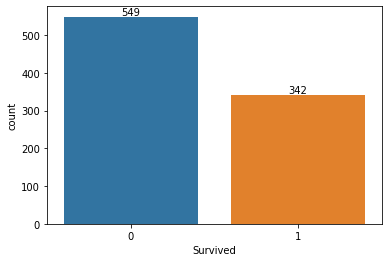

In [231]:
ax=sns.countplot(x=df_train["Survived"]);
ax.bar_label(ax.containers[0]);

In [232]:
##df=pd.concat(df_train,df_test)
df=df_train.append(df_test)

In [233]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [234]:
df["Fare"].mean(),df["Fare"].min(),df["Fare"].max(),df["Fare"].std()

(33.29547928134557, 0.0, 512.3292, 51.75866823917411)

In [235]:
##Fillna Boş Verileri Doldur -- Update Cümleciği

df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

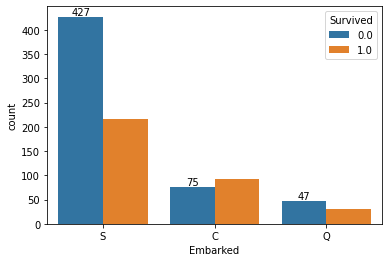

In [236]:
#https://towardsai.net/p/data-analysis/titanic-survival-prediction-i-bf5a04afff46
ax=sns.countplot(x=df["Embarked"],hue=df["Survived"]); ##hue ikinci data ile grafik zengileştirilir ayrıca 
ax.bar_label(ax.containers[0]);

In [237]:
#Hangi Limandan kaç kişi bindi
df["Embarked"].value_counts() ##Satır Sayını Verir İstasyon Lokasyon a Göre Gruplar

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [238]:
#Hangi Limandan kaç kişi bindi yüzdesi
df["Embarked"].value_counts(normalize=True) ##Yüzdesini Verir İstasyon Lokasyon a Göre Gruplar

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [239]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()) ## S geldiğini gördüğümüz için Maneul
df["Embarked"]=df["Embarked"].fillna('S')

In [240]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [241]:
## Verilerin %75 fazlası boş ise hesaplamaya dahil etmeye gerek yok
del df['Cabin']
## df.drop('Cabin', axis=1, inplace=True) ##axis=1 Sütün ,0=Satır

In [242]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)

In [243]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [244]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [245]:
## Veri Dönüşümlerini Title bazında Merge Ediyoruz.
df["Title"]=df["Title"].replace(["Ms","Mlle"],'Miss')
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],'Mrs')
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],'Mr')

In [246]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [247]:
##Age Alanın ortalama ile dolduruyorz , Cinsiyete göre Yaş Ortalaması
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [248]:
## Title göre Yaş Ortalaması
df.groupby("Title")["Age"].mean()

Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [249]:
## Title göre Yaş ortalaması Yapmak Daha mantıklı olduğından 
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform('median'))

<Axes: xlabel='Age', ylabel='Count'>

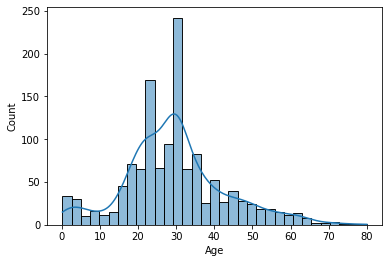

In [250]:
sns.histplot(df["Age"],kde=True)

In [251]:
df["Senior"]=df["Age"].map(lambda s:1 if s>70 else 0)

In [252]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Senior           0
dtype: int64

In [253]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Senior
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [254]:
## Kullanmayacağımız alanları çıkartıyoruz.
df.drop(["Name","Ticket"],axis=1,inplace=True)

In [255]:
##Family alanın Diğer Kolonlar ve kişinin Kendisini Dahil ederek Toplam Kişi sayısını çıkartıyorz.
df["Family"]=df["SibSp"]+df["Parch"]+1

<Axes: xlabel='Family', ylabel='Count'>

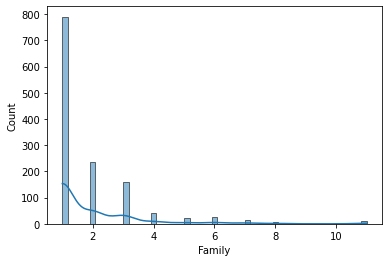

In [256]:
sns.histplot(df["Family"],kde=True)

In [257]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Senior,Family
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr,0,2
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs,0,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs,0,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1


In [258]:
## String alanlarını 1-0 Denomarlize Kolon olarak ekliyoruz. Bence  Nice Bir  hareket
data=pd.get_dummies(df,drop_first=True)

In [259]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,0,2,1,0,1,0,1,0
1,2,1.0,1,38.0,1,0,71.2833,0,2,0,0,0,0,0,1
2,3,1.0,3,26.0,0,0,7.9250,0,1,0,0,1,1,0,0
3,4,1.0,1,35.0,1,0,53.1000,0,2,0,0,1,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,0,1,1,0,1,0,1,0


In [260]:
##Nihai halini verdiğimiz veriyi DataSetimizi bir csv,excel vs. yazdırabiliyoruz.
data.to_csv('titanichazirveri.csv')

In [261]:
train=data[:891] ##Datanın Tekrar Split Edilmesi 891 e kadar Train 
test=data[891:]  ##Datanın Tekrar Split Edilmesi 891 sonrası Test

In [262]:
x=train.drop("Survived",axis=1)
y=train["Survived"]

In [263]:
#Modeller için fonksiyon yazıldı # Ham Dtaa ile Eğittiğimiz Modeli Join yapıp Export Csv Çıktııs alıyoruz.
def fnc_titanic_result_export(model,count):
    predict_x=model.predict(data[891:].drop("Survived",axis=1))
    result_dataset=pd.DataFrame()
    result_dataset["PassengerId"]=data[891:]["PassengerId"]
    result_dataset["Predict"]=predict_x
    result_dataset["Survived"]=result_dataset["Predict"].map(lambda s:1 if s>=0.5 else 0 )
    print(result_dataset["Survived"].value_counts().plot.bar())
    result_dataset.drop("Predict",axis=1).to_csv("titanic_deep_learning_result_model_keras_and_ml{}.csv".format(count),index=False)
    return result_dataset 

In [264]:
##Derin Öğrenme ile Modelimizi Eğitiyoruz. Model epoch=150

In [265]:
## Bu Değerlerle Başarı Oranımızı Düşürdük 61.2
#model=Sequential()
#model.add(Dense(32,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(8,activation='relu'))
#model.add(Dense(4,activation='relu')) 
#model.add(Dense(1,activation='sigmoid'))

model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [266]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [267]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 1s 2ms/step - loss: 0.7065 - accuracy: 0.6184
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.6173
Epoch 3/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.6150
Epoch 4/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6139
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6150
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6128
Epoch 7/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6150
Epoch 8/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6173
Epoch 9/150
90/90 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6105
Epoch 10/150
90/90 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6139
Epoch 11/

In [268]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 14)                210       
                                                                 
 dense_23 (Dense)            (None, 10)                150       
                                                                 
 dense_24 (Dense)            (None, 6)                 66        
                                                                 
 dense_25 (Dense)            (None, 1)                 7         
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [269]:
scores=model.evaluate(x,y)

28/28 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.8114


In [270]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 81.14%


14/14 [==============================] - 0s 2ms/step
Axes(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
0,892,0.093350,0
1,893,0.364598,0
2,894,0.074563,0
3,895,0.106582,0
4,896,0.538747,1
...,...,...,...
413,1305,0.089766,0
414,1306,0.791252,1
415,1307,0.063513,0
416,1308,0.089744,0


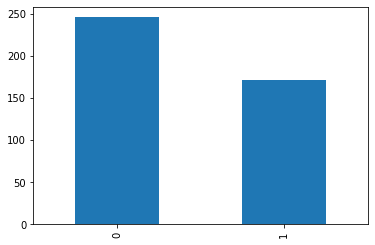

In [271]:
## Birinci model için (model.fit(x,y,epochs=150,batch_size=10,verbose=1))
fnc_titanic_result_export(model,1)

In [272]:

history=model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 1s 7ms/step - loss: 0.4398 - accuracy: 0.8114
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8058
Epoch 3/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.8103
Epoch 4/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8148
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8047
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8070
Epoch 7/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8081
Epoch 8/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8058
Epoch 9/150
90/90 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.8070
Epoch 10/150
90/90 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.8025
Epoch 11/

In [273]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


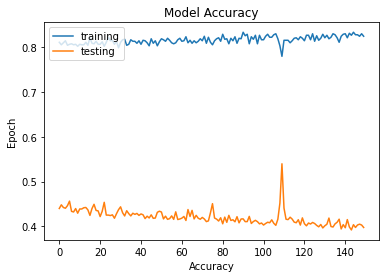

In [274]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

In [275]:
# Model - Two
## Modelimizi Epocs 200 ile yeniden bir Eğitiyoruz.


In [276]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [277]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [278]:
model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 2s - loss: 15.6737 - accuracy: 0.6053 - val_loss: 5.4566 - val_accuracy: 0.6425 - 2s/epoch - 29ms/step
Epoch 2/200
72/72 - 0s - loss: 0.8507 - accuracy: 0.5506 - val_loss: 0.6785 - val_accuracy: 0.6592 - 241ms/epoch - 3ms/step
Epoch 3/200
72/72 - 0s - loss: 0.6946 - accuracy: 0.6096 - val_loss: 0.7328 - val_accuracy: 0.3464 - 221ms/epoch - 3ms/step
Epoch 4/200
72/72 - 0s - loss: 0.6673 - accuracy: 0.5913 - val_loss: 0.6526 - val_accuracy: 0.6480 - 230ms/epoch - 3ms/step
Epoch 5/200
72/72 - 0s - loss: 0.6037 - accuracy: 0.6742 - val_loss: 0.5547 - val_accuracy: 0.7542 - 235ms/epoch - 3ms/step
Epoch 6/200
72/72 - 0s - loss: 0.6020 - accuracy: 0.6784 - val_loss: 0.6714 - val_accuracy: 0.6313 - 231ms/epoch - 3ms/step
Epoch 7/200
72/72 - 0s - loss: 0.5913 - accuracy: 0.6896 - val_loss: 0.6730 - val_accuracy: 0.6089 - 198ms/epoch - 3ms/step
Epoch 8/200
72/72 - 0s - loss: 0.5937 - accuracy: 0.6826 - val_loss: 0.6218 - val_accuracy: 0.7151 - 195ms/epoch - 3ms/step
Epoch 9/2

In [279]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 14)                210       
                                                                 
 dense_27 (Dense)            (None, 10)                150       
                                                                 
 dense_28 (Dense)            (None, 6)                 66        
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [280]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8238


In [281]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 82.38%


14/14 [==============================] - 0s 2ms/step
Axes(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
0,892,0.068816,0
1,893,0.368342,0
2,894,0.053762,0
3,895,0.072527,0
4,896,0.517787,1
...,...,...,...
413,1305,0.039879,0
414,1306,0.994355,1
415,1307,0.029488,0
416,1308,0.039742,0


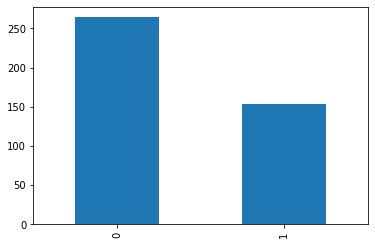

In [282]:
## İkinci model için model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2))
fnc_titanic_result_export(model,2)

In [283]:
history=model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 0s - loss: 0.4193 - accuracy: 0.8062 - val_loss: 0.3953 - val_accuracy: 0.8045 - 458ms/epoch - 6ms/step
Epoch 2/200
72/72 - 0s - loss: 0.4241 - accuracy: 0.8118 - val_loss: 0.3940 - val_accuracy: 0.8156 - 364ms/epoch - 5ms/step
Epoch 3/200
72/72 - 0s - loss: 0.4153 - accuracy: 0.8146 - val_loss: 0.4571 - val_accuracy: 0.7709 - 357ms/epoch - 5ms/step
Epoch 4/200
72/72 - 0s - loss: 0.4225 - accuracy: 0.8160 - val_loss: 0.3813 - val_accuracy: 0.8268 - 376ms/epoch - 5ms/step
Epoch 5/200
72/72 - 0s - loss: 0.4957 - accuracy: 0.8034 - val_loss: 0.4012 - val_accuracy: 0.8101 - 320ms/epoch - 4ms/step
Epoch 6/200
72/72 - 0s - loss: 0.4477 - accuracy: 0.8076 - val_loss: 0.5736 - val_accuracy: 0.7709 - 362ms/epoch - 5ms/step
Epoch 7/200
72/72 - 0s - loss: 0.4426 - accuracy: 0.8132 - val_loss: 0.3983 - val_accuracy: 0.8156 - 379ms/epoch - 5ms/step
Epoch 8/200
72/72 - 0s - loss: 0.4268 - accuracy: 0.8118 - val_loss: 0.3809 - val_accuracy: 0.8268 - 278ms/epoch - 4ms/step
Epoch 9/

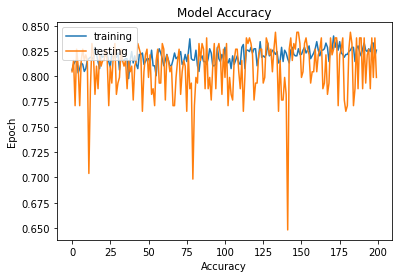

In [284]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

<function matplotlib.pyplot.show(close=None, block=None)>

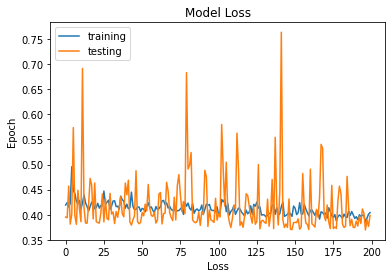

In [285]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

plt.show